<a href="https://colab.research.google.com/github/christophecudel/demo_CNN/blob/main/demo_cnn_01_(N_Classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Etape 1 : organniser les données pour les rendre
## compatibles avec l'apprentissage du CNN

# Organniser les dossiers comme suit :
# DataBase |- Train |---- Classe_0
#          |        |---- Classe_1
#          |        |............
#          |        |---- Classe_N
#          |
#          |-- Test |---- Classe_0
#          |        |---- Classe_1
#          |        |............
#          |        |---- Classe_N


# A partir des images "Classe_0", "Classe_1", etc.... :
# Environ 80% des images vont dans Train
# et 20% dans Test

# Une fois le dossier correctement constitué :
# - faire un .zip
# - télécharger le .zip avec la ligne ci-dessous

import glob
from google.colab import files

uploaded = files.upload()

Saving DataMultiClasses.zip to DataMultiClasses.zip


In [2]:
# le fichier est décompressé dans l'envirronnement local
!unzip DataMultiClasses.zip # >> my_images_base.zip est le nom de votre fichier qui a été téléchargé

Archive:  DataMultiClasses.zip
   creating: DataMultiClasses/
   creating: DataMultiClasses/Eval/
  inflating: DataMultiClasses/Eval/im_ok_000.bmp  
  inflating: DataMultiClasses/Eval/im_ok_001.bmp  
  inflating: DataMultiClasses/Eval/im_ok_002.bmp  
  inflating: DataMultiClasses/Eval/im_ok_003.bmp  
  inflating: DataMultiClasses/Eval/im_ok_004.bmp  
  inflating: DataMultiClasses/Eval/im_ok_005.bmp  
  inflating: DataMultiClasses/Eval/im_ok_006.bmp  
  inflating: DataMultiClasses/Eval/im_ok_007.bmp  
  inflating: DataMultiClasses/Eval/im_ok_008.bmp  
  inflating: DataMultiClasses/Eval/im_ok_009.bmp  
  inflating: DataMultiClasses/Eval/im_ok_010.bmp  
  inflating: DataMultiClasses/Eval/im_ok_011.bmp  
  inflating: DataMultiClasses/Eval/im_ok_012.bmp  
  inflating: DataMultiClasses/Eval/im_ok_013.bmp  
  inflating: DataMultiClasses/Eval/im_ok_014.bmp  
  inflating: DataMultiClasses/Eval/im_ok_015.bmp  
  inflating: DataMultiClasses/Eval/im_ok_016.bmp  
  inflating: DataMultiClasses/Eval/

In [3]:
import os

# Lister le contenu de DataBase_05
# Attention au respect des Majuscules minuscules
os.listdir("/content/DataMultiClasses")


['Eval', 'Train', 'Test']

In [5]:
# Etape 2 : préparer l'apprentissage
# précisant bien les dossiers à prendre en compte :
# chemins vers vos dossiers d'images d'entraînement et de test
# depuis l'environnement google colab
train_data_dir = "/content/DataMultiClasses/Train" # par exemple - à ajuster
test_data_dir = "/content/DataMultiClasses/Test" # par exemple - à ajuster

# Ici, on vérifie que l'accès aux images est OK :
images_dir = "/content/DataMultiClasses/Train/OK/*.bmp"
images_name = glob.glob(images_dir)
print(images_name)
#print("first and last images name : ",images_name[0],",", images_name[-1])

# Si l'instruction ne retourne pas les noms de fichier
# de la 1ère et dernière image : revoir les étapes pér


['/content/DataMultiClasses/Train/OK/im_ok_011.bmp', '/content/DataMultiClasses/Train/OK/im_ok_040.bmp', '/content/DataMultiClasses/Train/OK/im_ok_027.bmp', '/content/DataMultiClasses/Train/OK/im_ok_021.bmp', '/content/DataMultiClasses/Train/OK/im_ok_024.bmp', '/content/DataMultiClasses/Train/OK/im_ok_000.bmp', '/content/DataMultiClasses/Train/OK/im_ok_041.bmp', '/content/DataMultiClasses/Train/OK/im_ok_035.bmp', '/content/DataMultiClasses/Train/OK/im_ok_038.bmp', '/content/DataMultiClasses/Train/OK/im_ok_030.bmp', '/content/DataMultiClasses/Train/OK/im_ok_017.bmp', '/content/DataMultiClasses/Train/OK/im_ok_014.bmp', '/content/DataMultiClasses/Train/OK/im_ok_033.bmp', '/content/DataMultiClasses/Train/OK/im_ok_019.bmp', '/content/DataMultiClasses/Train/OK/im_ok_003.bmp', '/content/DataMultiClasses/Train/OK/im_ok_034.bmp', '/content/DataMultiClasses/Train/OK/im_ok_007.bmp', '/content/DataMultiClasses/Train/OK/im_ok_005.bmp', '/content/DataMultiClasses/Train/OK/im_ok_002.bmp', '/content/D

In [6]:
# Etape 3 :On affiche les dimensions des images
from PIL import Image

# Ouvrir l'image PNG
image = Image.open(images_name[0])

# Obtenir les dimensions de l'image
NbCols, NbRows = image.size

if image.mode == 'RGB':
    NbCanaux = 3
elif image.mode == 'L':
    NbCanaux = 1
else:
    NbCanaux = 'Inconnu'  # Pour d'autres modes, la gestion peut être ajoutée selon les besoins

# Afficher les informations
print(f'Nombre de colonnes (largeur): {NbCols}, Nombre de lignes (hauteur): {NbRows}, Nombre de canaux: {NbCanaux}')


Nombre de colonnes (largeur): 256, Nombre de lignes (hauteur): 256, Nombre de canaux: 1


Found 148 images belonging to 3 classes.
Found 53 images belonging to 3 classes.
Nombre de classes (N) : 3
Indices des classes : {'DefaillanceJoint': 0, 'DefaillanceVis': 1, 'OK': 2}
Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 544ms/step - accuracy: 0.3874 - loss: 1.4459 - val_accuracy: 0.5283 - val_loss: 1.0277
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4602 - loss: 1.0557 - val_accuracy: 0.5283 - val_loss: 1.1569
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4722 - loss: 1.1792 - val_accuracy: 0.5283 - val_loss: 1.0332
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5198 - loss: 1.0267 - val_accuracy: 0.5283 - val_loss: 1.0424
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4578 - loss: 1.0325 - val_accuracy: 0.5283 - val_loss: 1.0022
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5283 - loss: 0.9576 - val_accuracy: 0.4906 - val_loss: 0.9920
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/

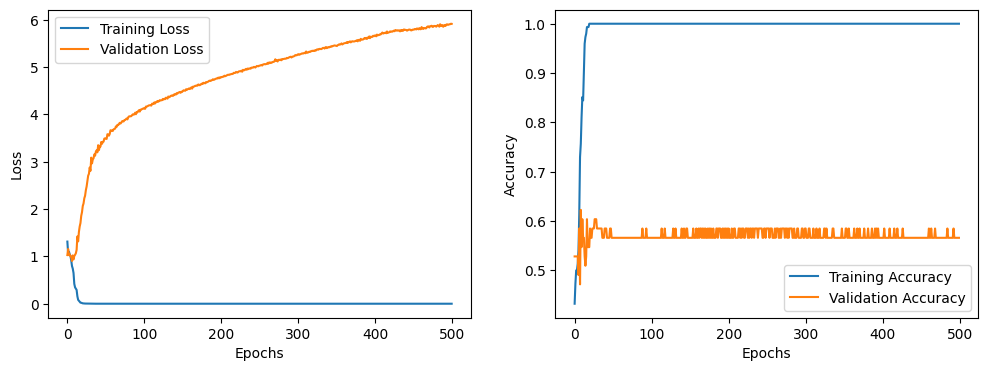

In [11]:
# Etape 4 : apprentissage
# Préparation des paramètres pour la
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np

# Créez des générateurs de données pour l'entraînement et le test
image_size = (NbRows, NbCols)
batch_size = 10

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255 #,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # N classes : déduit du nombre de sous-dossiers dans train_data_dir
    shuffle=True
)

# Créez un générateur de données pour charger et prétraiter les images de test
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # même type de sortie que pour l'entraînement
    shuffle=False  # Vous pouvez désactiver le mélange pour garder l'ordre
)

# N = nombre de classes détectées automatiquement à partir des sous-dossiers
num_classes = train_generator.num_classes
print("Nombre de classes (N) :", num_classes)
print("Indices des classes :", train_generator.class_indices)

# Créez un modèle CNN
model = keras.Sequential([
    layers.Input(shape=(NbRows, NbCols, 3)),  # Déclaration de l'entrée ici
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(NbRows, NbCols, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # N classes, décision multi-classes
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
num_epochs = 500

history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Accuracy on test set: {test_acc}')

# Sauvegarder le modèle si nécessaire
# ces lignes demandent une durée d'excécution non négligeables
# elles sont nécessaires si on excecute le "model" de CNN dans un autre code
# il faut alors re-charger le "model" de CNN
# chaine = f"content/Classif_keras_{num_epochs:02d}_epochs"
# model.save(chaine)

# Afficher les courbes de loss et d'accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [12]:
#Etape 5 : le modèle est testé sur des images

from tensorflow.keras.preprocessing import image
import os
import numpy as np

# Spécifiez le chemin du dossier contenant les images à prédire
images_directory = "/content/DataMultiClasses/Eval"

# Créez des listes pour stocker les images, les prédictions et les noms de fichiers
images = []
predictions = []
image_names = []

# Récupérer la correspondance indice -> nom de classe à partir du générateur d'entraînement
class_indices = train_generator.class_indices           # dict : nom_de_classe -> indice
idx_to_class = {v: k for k, v in class_indices.items()} # dict : indice -> nom_de_classe

# Parcourez les fichiers d'images dans le dossier
for filename in os.listdir(images_directory):
    if filename.lower().endswith('.bmp'):
        # Charger l'image pour la prédiction
        image_path = os.path.join(images_directory, filename)
        img = image.load_img(image_path, target_size=(NbRows, NbCols))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Assurez-vous de normaliser l'image comme pendant l'entraînement

        # Faire la prédiction : vecteur de probabilités de taille N (num_classes)
        proba = model.predict(img_array, verbose=0)[0]

        # Stocker les résultats
        predictions.append(proba)
        images.append(img)
        image_names.append(filename)

        # Afficher la classe prédite dans la console (optionnel)
        pred_class_idx = np.argmax(proba)
        pred_class_name = idx_to_class[pred_class_idx]
        print(f"{filename} -> classe prédite : {pred_class_name}, proba = {proba[pred_class_idx]:.3f}")

# Afficher le nombre total d'images traitées
print("Nombre d'images traitées :", len(images))


im_ok_011.bmp -> classe prédite : OK, proba = 1.000
im_ok_040.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_027.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_021.bmp -> classe prédite : OK, proba = 1.000
im_ok_024.bmp -> classe prédite : OK, proba = 0.998
im_ok_000.bmp -> classe prédite : OK, proba = 1.000
im_ok_041.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_035.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_052.bmp -> classe prédite : DefaillanceVis, proba = 0.999
im_ok_038.bmp -> classe prédite : DefaillanceJoint, proba = 0.996
im_ok_030.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_017.bmp -> classe prédite : DefaillanceVis, proba = 0.945
im_ok_014.bmp -> classe prédite : OK, proba = 0.536
im_ok_033.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_019.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_049.bmp -> classe prédite : DefaillanceVis, proba = 1.000
im_ok_045.bmp -> classe prédite : 

IntSlider(value=0, description='Image Index:', max=52)

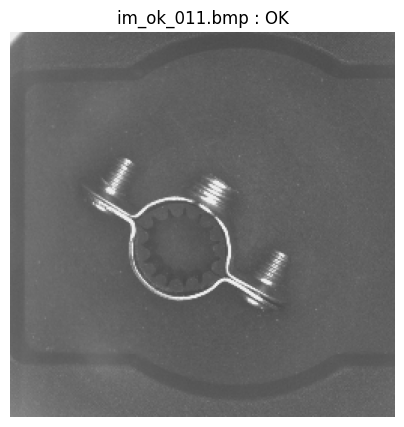

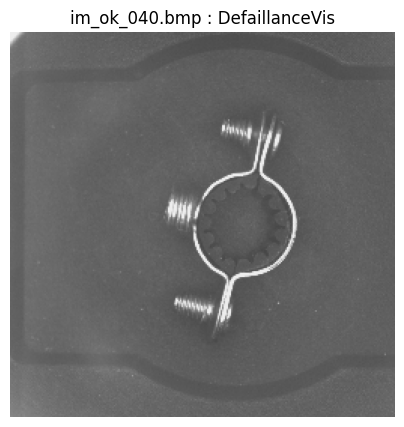

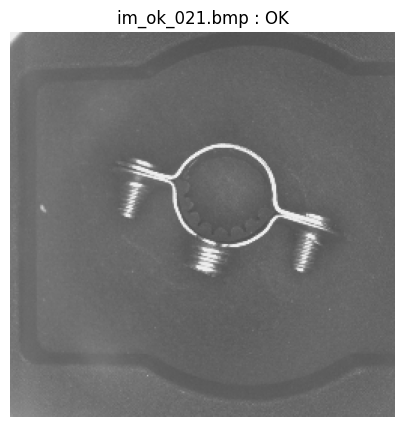

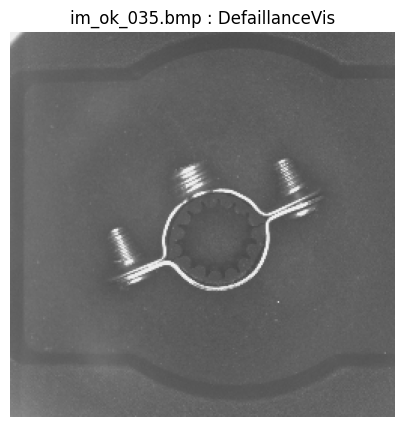

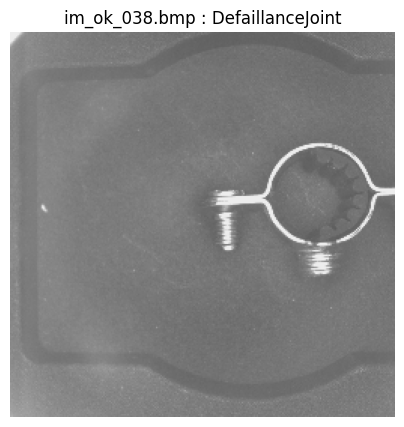

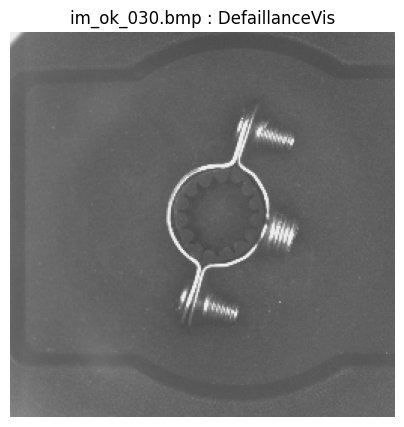

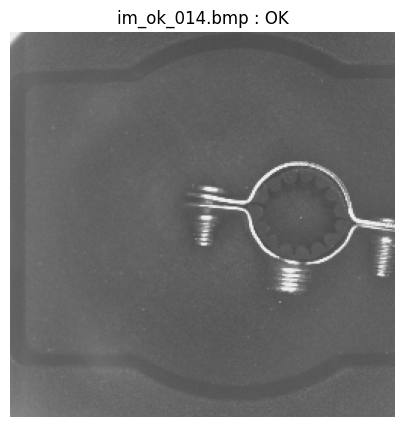

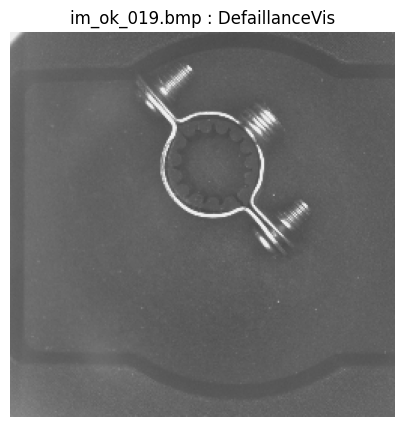

In [13]:
# Etape 5 : visualisation des résultats sur les images de test
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les listes 'images', 'predictions' et 'image_names'
# ont été remplies dans l'étape 5.

# Récupérer (au cas où) la correspondance indice -> nom de classe
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Créer un widget Output pour l'affichage des images
output = widgets.Output()

# Créer un slider
slider = widgets.IntSlider(min=0, max=len(images) - 1, step=1, description='Image Index:')

# Fonction pour mettre à jour l'image et le nom
def update_image(change):
    img_index = change['new']  # Utilisation de change['new'] au lieu de change.new
    with output:
        clear_output(wait=True)  # Effacer l'affichage précédent
        plt.figure(figsize=(5,5))  # Ajustez la taille si nécessaire
        plt.imshow(images[img_index])  # Afficher la nouvelle image
        plt.axis('off')

        # Récupérer le vecteur de probabilités pour cette image
        proba = predictions[img_index]
        pred_class_idx = int(np.argmax(proba))
        classe = idx_to_class[pred_class_idx]

        plt.title(image_names[img_index] + ' : ' + classe, fontsize=12)
        plt.show()

# Observer les changements du slider
slider.observe(update_image, names='value')

# Afficher le slider et la zone d'affichage
display(slider)
display(output)

# Affichage initial
update_image({'new': slider.value})
